
# Unsupervised Learning Lab: Customer Segmentation

## Introduction
Welcome to the Unsupervised Learning lab. You will perform customer segmentation using unsupervised learning techniques on customer data from a store. You will read the dataset using pandas and apply various clustering algorithms to segment the customers.

### Dataset
The dataset contains the following columns:
- `CustomerID`: Unique identifier for each customer
- `Age`: Age of the customer
- `AnnualIncome`: Annual income of the customer in dollars
- `SpendingScore`: A score assigned to the customer based on their spending behavior

### Instructions
1. Follow the steps in each exercise to preprocess the data, apply the clustering algorithms, and visualize the results.
2. Analyze the clusters and interpret the results.


## Exercise 1: Data Preprocessing and Exploration
1. Load the dataset using pandas.
2. Explore the dataset to understand its structure and contents.
3. Perform basic data cleaning, if necessary (e.g., handling missing values, if any).
4. Standardize the numerical features to ensure they are on a similar scale.

In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# load customer dataset 
customer_data = "customer_data.csv"
df_customer_data = pd.read_csv(customer_data)
df_customer_data

,CustomerID,Age,AnnualIncome,SpendingScore
0,1,56,81228,59
1,2,69,68984,32
2,3,46,60774,96
3,4,32,22568,88
4,5,60,82592,52
...,...,...,...,...
95,96,42,117504,24
96,97,62,118098,54
97,98,58,33545,33
98,99,46,86199,24


In [4]:
# Summary of the data: checking data types
column_summary_df_customer_data = pd.DataFrame({
    'Column Name': df_customer_data.columns,
    'Data Type': df_customer_data.dtypes.values,
    'Non-Null Count': df_customer_data.notnull().sum().values,
    'Null Count': df_customer_data.isnull().sum().values,
    'Data Type': df_customer_data.dtypes.values,
    'Percentage Null': df_customer_data.isnull().mean().values * 100,
    'Unique Values': df_customer_data.nunique().values
})

print(column_summary_df_customer_data)

     Column Name Data Type  Non-Null Count  Null Count  Percentage Null  \
0     CustomerID     int64             100           0              0.0   
1            Age     int64             100           0              0.0   
2   AnnualIncome     int64             100           0              0.0   
3  SpendingScore     int64             100           0              0.0   

   Unique Values  
0            100  
1             47  
2            100  
3             57  


In [6]:
# Summary of the data: checking numerical distribution of data
df_customer_data.describe()

,CustomerID,Age,AnnualIncome,SpendingScore
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,43.350000,69474.690000,48.760000
std,29.011492,14.904663,29863.619229,31.064976
min,1.000000,19.000000,20206.000000,1.000000
25%,25.750000,31.750000,43229.750000,20.000000
50%,50.500000,42.000000,70325.500000,52.000000
75%,75.250000,57.000000,95529.000000,73.500000
max,100.000000,69.000000,118806.000000,99.000000


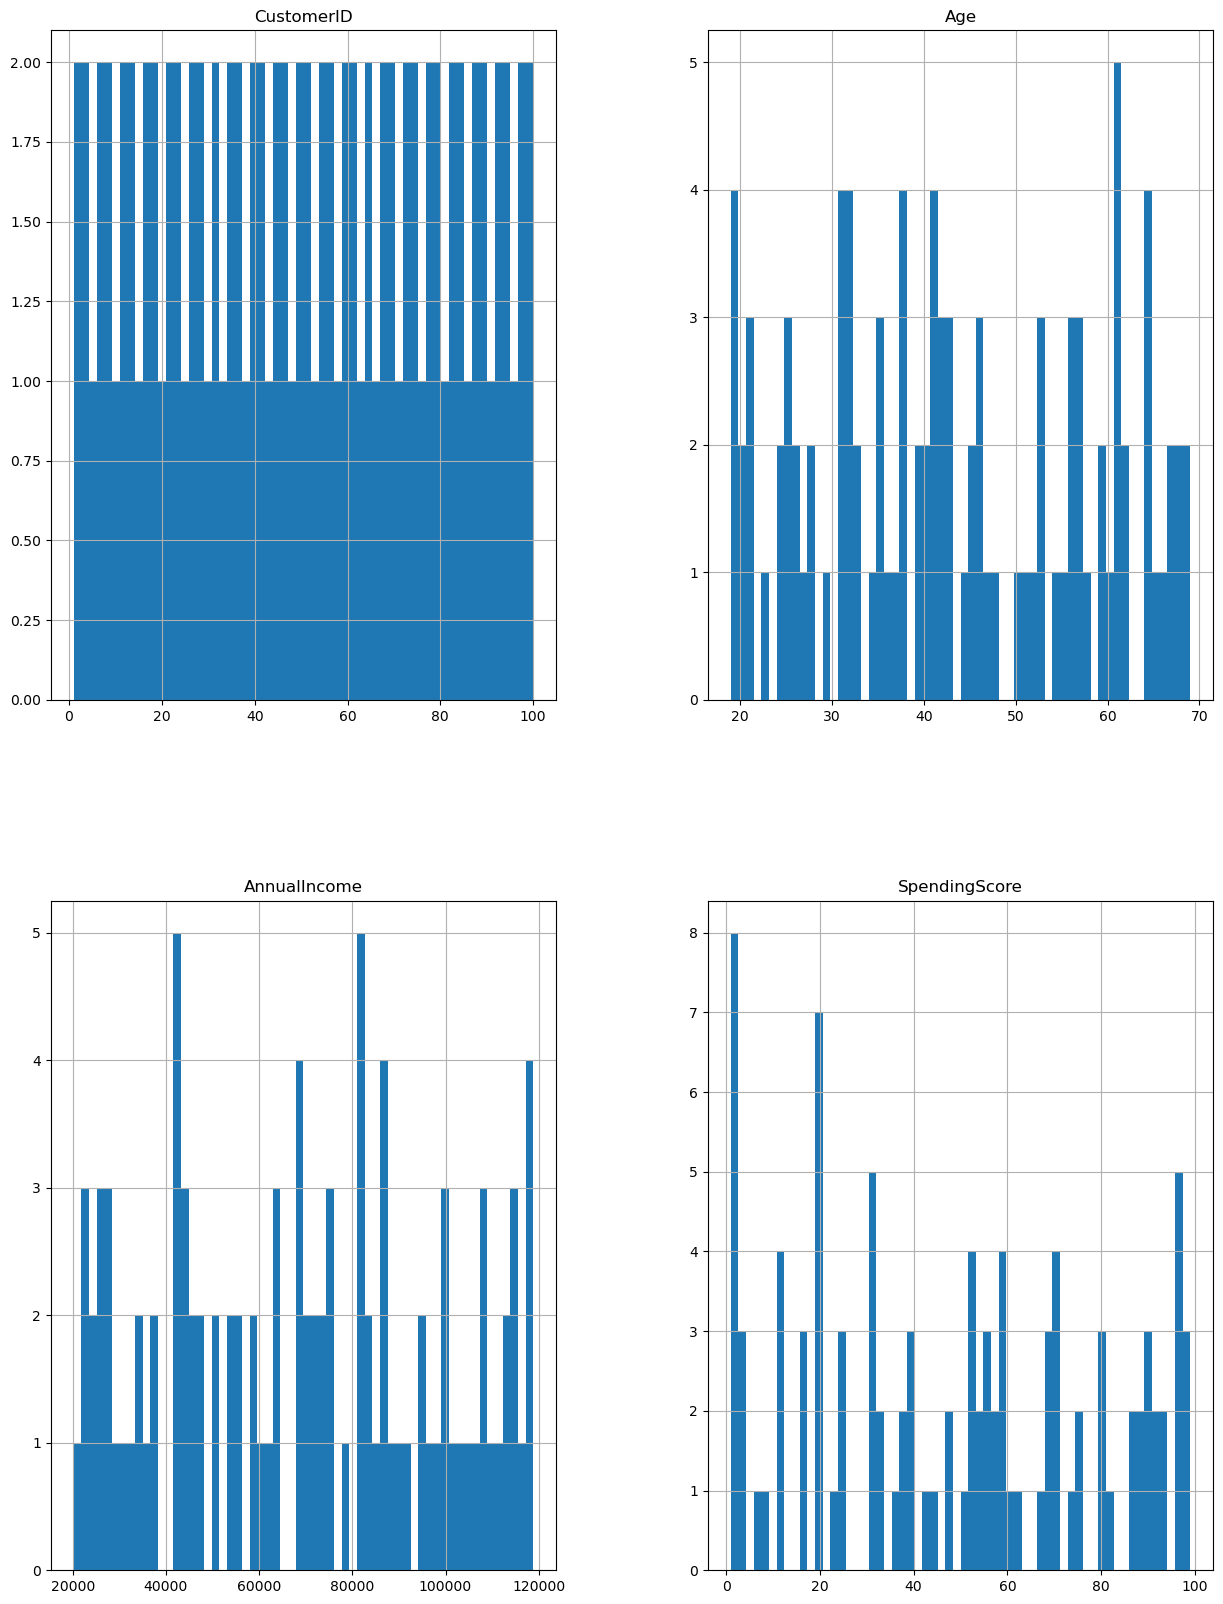

In [8]:
# Creating histograms for each numerical column in 'df_customer_data' to check for distribution
df_customer_data.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10);
plt.show()

In [12]:
# Define the features of df_customer_data:
df_customer_features = df_customer_data[["Age", "AnnualIncome", "SpendingScore"]]
df_customer_features

,Age,AnnualIncome,SpendingScore
0,56,81228,59
1,69,68984,32
2,46,60774,96
3,32,22568,88
4,60,82592,52
...,...,...,...
95,42,117504,24
96,62,118098,54
97,58,33545,33
98,46,86199,24


In [92]:
# Standardize the numerical columns of df_customer_data to ensure they are on a similar scale.
scaler = StandardScaler()
scaler.fit(df_customer_features)

StandardScaler()

In [20]:
# import libraries
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import cluster, datasets

In [94]:
# Apply K-Means clustering to customer features
kmeans = cluster.KMeans()
kmeans.fit(df_customer_features)
pred_kmeans = kmeans.predict(df_customer_features)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

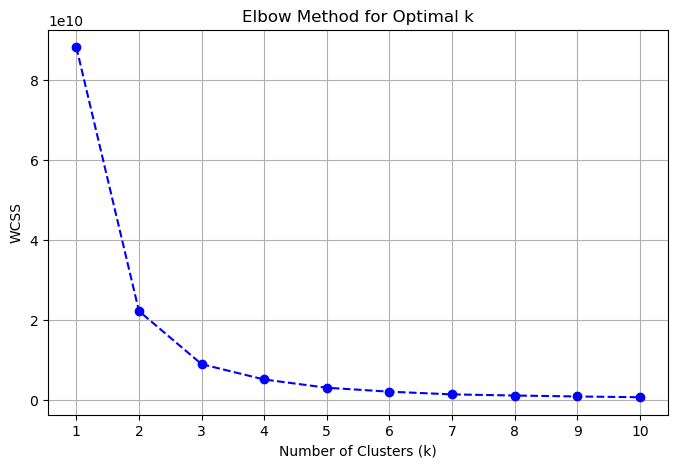

In [96]:
# Determine the optimal number of clusters using the Elbow method.

# Define range of clusters
wcss = []  # Store Within-Cluster Sum of Squares

# Iterate over a range of k values
for k in range(1, 11):  # Testing k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(df_customer_features)
    wcss.append(kmeans.inertia_)  # Inertia = WCSS

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [98]:
# The "elbow" point is where the WCSS curve starts to bend, indicating diminishing returns from adding more clusters.
# So here: "elbow" point = optimal number of clusters = 3.

In [100]:
# Calculating the elbow point:
!pip install kneed
from kneed import KneeLocator

knee = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
print(f"Optimal number of clusters: {knee.elbow}")

Optimal number of clusters: 3


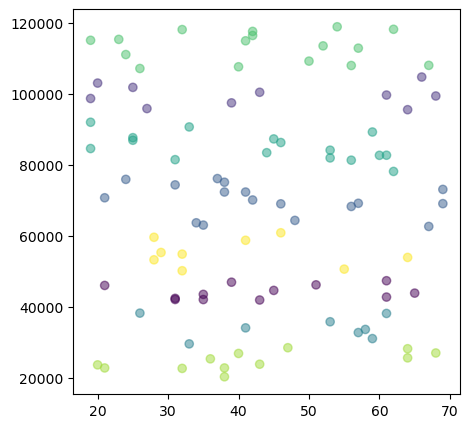

In [132]:
# Visualize the clusters using scatter plots.
plt.figure(figsize=(5, 5))
plt.scatter(df_customer_features.to_numpy()[:, 0], df_customer_features.to_numpy()[:, 1], c=pred_kmeans, alpha=0.5)
plt.show()

In [102]:
# Apply KMeans clustering
y_kmeans = kmeans.fit_predict(df_customer_features)  # Predict cluster labels

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


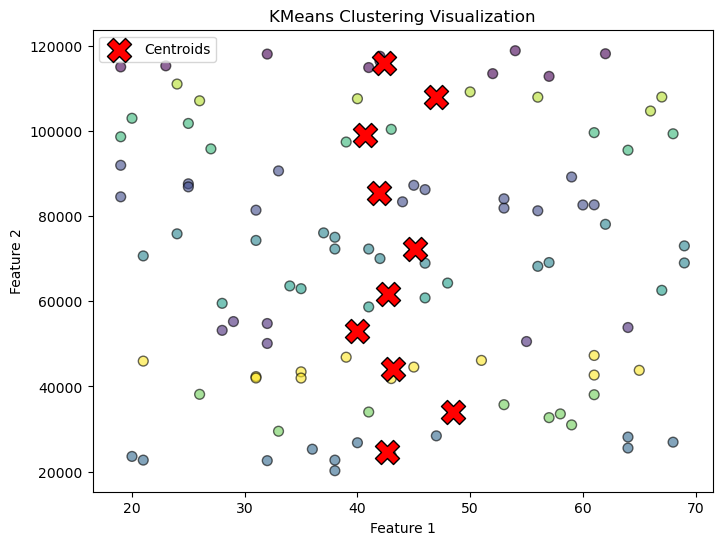

In [134]:
# Visualize the clusters using scatter plots.

plt.figure(figsize=(8, 6))
plt.scatter(df_customer_features.to_numpy()[:, 0], df_customer_features.to_numpy()[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.6, edgecolors='k')

# Plot the cluster centers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='red', marker='X', edgecolors='black', label='Centroids')

# Labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering Visualization')
plt.legend()
plt.show()

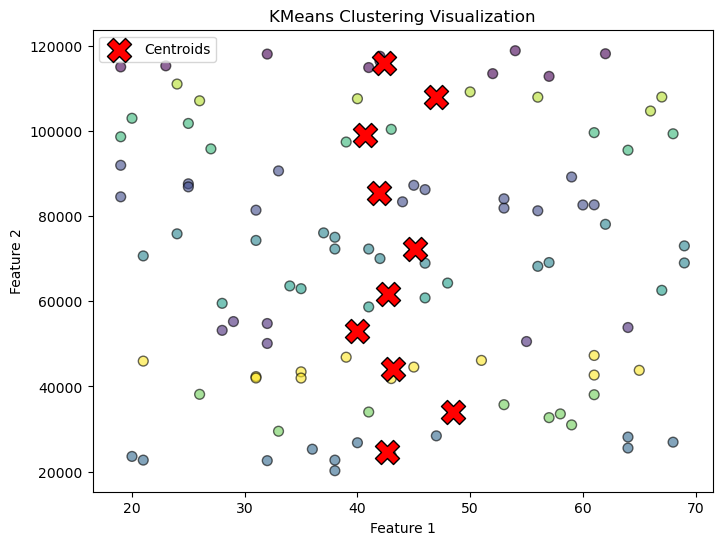

In [136]:
# Visualize the clusters using scatter plots.

plt.figure(figsize=(8, 6))
plt.scatter(df_customer_features.to_numpy()[:, 0], df_customer_features.to_numpy()[:, 1], c=y_kmeans, cmap='viridis', s=50, alpha=0.6, edgecolors='k')

# Ensure cluster centers are properly indexed
if hasattr(kmeans, "cluster_centers_"):
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
                s=300, c='red', marker='X', edgecolors='black', label='Centroids')

# Labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('KMeans Clustering Visualization')
plt.legend()
plt.show()

## Exercise 3: Hierarchical Clustering
1. Apply Agglomerative Hierarchical Clustering to the same features.
2. Use a dendrogram to determine the optimal number of clusters.
3. Visualize the clusters using scatter plots.

In [48]:
# import libraries
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [114]:
# Apply Agglomerative Hierarchical Clustering to the same features.

agglomerative = cluster.AgglomerativeClustering(linkage='ward')
pred_agg = agglomerative.fit_predict(df_customer_features)

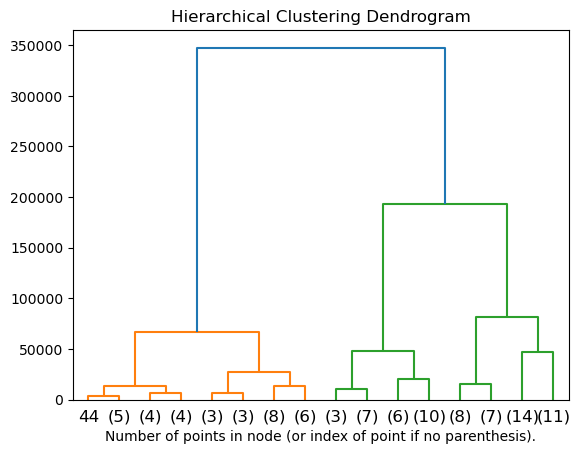

In [116]:
# Use a dendrogram to determine the optimal number of clusters.

from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(df_customer_features)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [118]:
# optimal number of clusters according to dendrogram = 3.

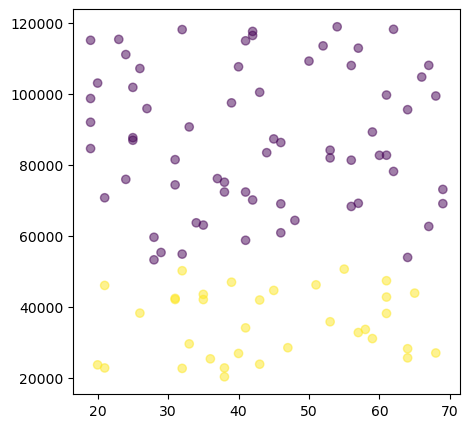

In [138]:
# Visualization of clusters
plt.figure(figsize=(5, 5))
plt.scatter(df_customer_features.to_numpy()[:, 0], df_customer_features.to_numpy()[:, 1], c=pred_agg, alpha=0.5)
plt.show()

## Exercise 4: DBSCAN Clustering
1. Apply DBSCAN clustering to the same features.
2. Experiment with different values of `eps` and `min_samples` to find the best clustering results.
3. Visualize the clusters using scatter plots.

In [78]:
# import libraries
from sklearn.cluster import DBSCAN

In [122]:
# Apply DBSCAN clustering to the same features.

dbs = cluster.DBSCAN(eps=0.1, min_samples = 5) #change maximum distance and see effect
# eps is the maximum distance between two samples for one to be considered as in the neighborhood of the other.
# min_samples is the number of samples in a neighborhood for a point to be considered as a core point.

pred_dbscan = dbs.fit_predict(df_customer_features)
pred_dbscan

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [124]:
# Experiment with different values of eps and min_samples to find the best clustering results.
dbs = cluster.DBSCAN(eps=0.2, min_samples = 5)
pred_dbscan2 = dbs.fit_predict(df_customer_features)
pred_dbscan2

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

In [126]:
# Experiment with different values of eps and min_samples to find the best clustering results.
dbs = cluster.DBSCAN(eps=0.5, min_samples = 5)
pred_dbscan3 = dbs.fit_predict(df_customer_features)
pred_dbscan3

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
      dtype=int64)

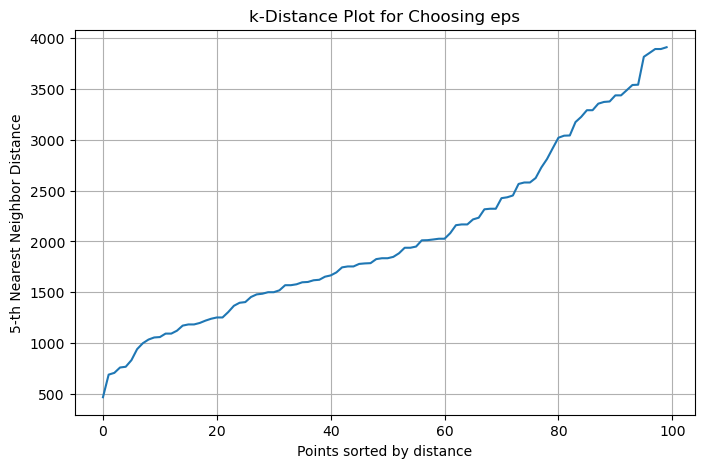

In [130]:
# Experiment with different values of eps and min_samples to find the best clustering results.
from sklearn.neighbors import NearestNeighbors

# Compute k-distance for min_samples=5
k = 5
nbrs = NearestNeighbors(n_neighbors=k).fit(df_customer_features)
distances, indices = nbrs.kneighbors(df_customer_features)

# Sort distances (use the k-th neighbor's distance)
distances = np.sort(distances[:, k-1])

# Plot k-distance graph
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{k}-th Nearest Neighbor Distance")
plt.title("k-Distance Plot for Choosing eps")
plt.grid(True)
plt.show()

In [142]:
# Automatically determine eps and min_samples:

# Define min_samples based on ln(n)
n = len(df_customer_features)
min_samples = int(np.log(n))  # Recommended min_samples ≈ ln(n)

# Compute k-distance for min_samples
nbrs = NearestNeighbors(n_neighbors=min_samples).fit(df_customer_features)
distances, _ = nbrs.kneighbors(df_customer_features)

# Sort distances (use k-th neighbor's distance)
distances = np.sort(distances[:, min_samples - 1])

# Find the elbow (optimal eps)
knee = KneeLocator(range(1, len(distances) + 1), distances, curve="convex", direction="increasing")

optimal_eps = knee.elbow_y  # Get the y-value at the elbow point

# Print optimal values
print(f"Optimal eps: {optimal_eps:.3f}")
print(f"Optimal min_samples: {min_samples}")

Optimal eps: 3079.331
Optimal min_samples: 4


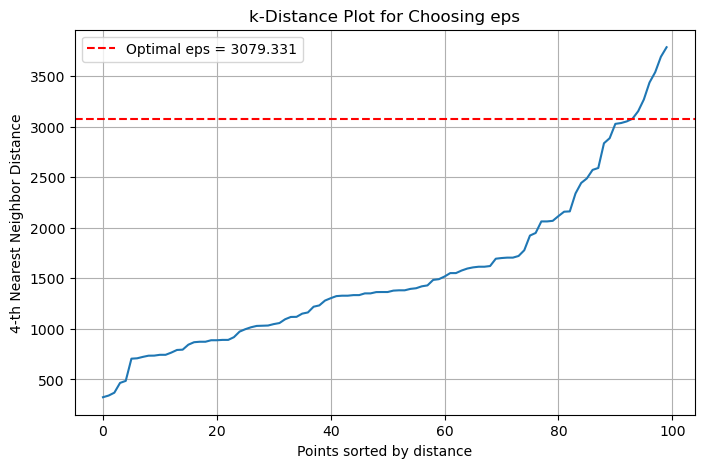

In [146]:
# Visualize the knee point

plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.axhline(y=optimal_eps, color='r', linestyle='--', label=f"Optimal eps = {optimal_eps:.3f}")
plt.xlabel("Points sorted by distance")
plt.ylabel(f"{min_samples}-th Nearest Neighbor Distance")
plt.title("k-Distance Plot for Choosing eps")
plt.legend()
plt.grid(True)
plt.show()

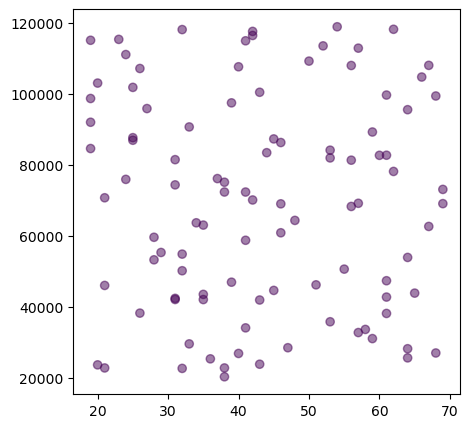

In [144]:
# Visualize the clusters using scatter plots.
plt.figure(figsize=(5, 5))
plt.scatter(df_customer_features.to_numpy()[:, 0], df_customer_features.to_numpy()[:, 1], c=pred_dbscan, alpha=0.5)
plt.show()